In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from track_linearization import make_track_graph, plot_track_graph
from track_linearization.utils import plot_graph_as_1D
from track_linearization import get_linearized_position
import matplotlib.pyplot as plt
from ripple_heterogeneity.utils import loading
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [77]:
basepath = "Z:\Data\Can\OML23\day10"
behav_df = loading.load_animal_behavior(basepath)
bad_idx = np.isnan(behav_df.x)
behav_df = behav_df[~bad_idx]
behav_df[["x", "y"]] = behav_df[["x", "y"]]

In [81]:
np.abs(np.diff(behav_df.x)).mean()

np.abs(np.diff(np.sqrt(behav_df.x**2 + behav_df.y**2)))

array([0.31629989, 0.19097655, 0.20014718, ..., 0.01569905, 0.03108916,
       0.05893721])

In [93]:
np.abs(np.diff(np.sqrt(behav_df.x**2 + behav_df.y**2))).std()*20

10.614217259986521

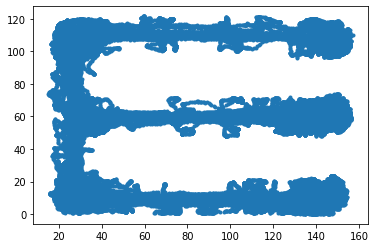

In [82]:
plt.plot(behav_df.x, behav_df.y, ".")

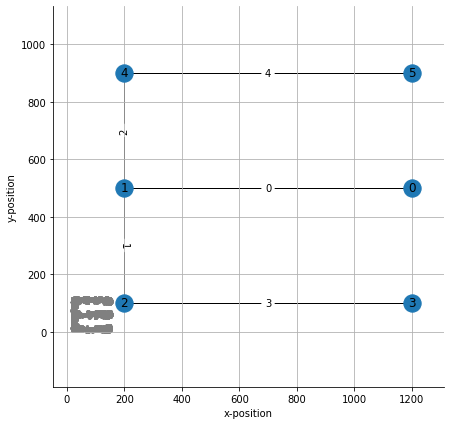

In [78]:
# %matplotlib widget
plt.ion()
node_positions = [(1200, 500), (200, 500), (200, 100), (1200, 100), (200, 900), (1200, 900)] 
edges = [
    (0, 1),
    (1, 2),
    (2, 3),
    (1, 4),
    (4, 5),
]
track_graph = make_track_graph(node_positions, edges)

fig, ax = plt.subplots(figsize=(7, 7))

plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.scatter(behav_df.x, behav_df.y, s=1, zorder=-11, color="grey")
plt.axis("equal")
plt.grid()
plt.show()

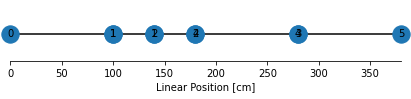

In [58]:
# edge_order = [(4, 5), (5, 1), (1, 2), (5, 0), (0, 3)]
# edge_spacing = [30, 0, 30, 0]

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph, ax=ax)


In [59]:
position = np.vstack([behav_df.x.values, behav_df.y.values]).T
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    use_HMM=True,
)


In [51]:
np.isnan(position).any()

False

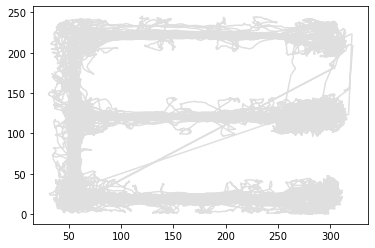

In [55]:
plt.plot(position[:,0], position[:,1], color="grey", ms=1,alpha=.25)

In [53]:
position_df.track_segment_id.unique()

array([0., 1., 2., 4., 3.])

(6.413116111755372, 134.33919940948485, -4.782488937377931, 103.00075828552247)

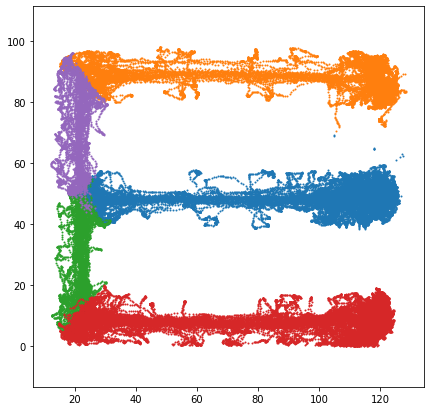

In [60]:
fig, ax = plt.subplots(figsize=(7, 7))

for track_segment_id in position_df.track_segment_id.unique():
    idx = position_df.track_segment_id == track_segment_id
    ax.scatter(position[idx, 0], position[idx, 1], s=1, zorder=2, clip_on=False)
plt.axis("equal")


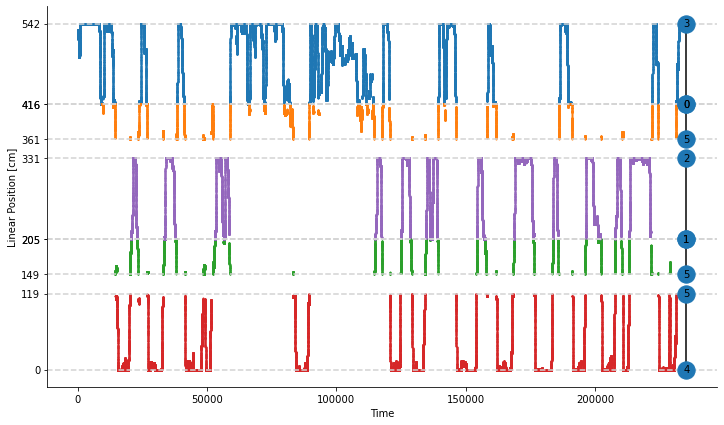

In [17]:
fig, ax = plt.subplots(figsize=(12, 7))
# ax.scatter(position_df.index, position_df.linear_position, s=1, zorder=2, clip_on=False)

for track_segment_id in position_df.track_segment_id.unique():
    idx = position_df.track_segment_id == track_segment_id
    ax.scatter(
        position_df.index[idx],
        position_df.linear_position[idx],
        s=1,
        zorder=2,
        clip_on=False,
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)

start_node_linear_position = 0.0
ticks = []

for ind, edge in enumerate(edge_order):
    end_node_linear_position = (
        start_node_linear_position + track_graph.edges[edge]["distance"]
    )
    ax.axhline(start_node_linear_position, color="lightgrey", linestyle="--")
    ax.axhline(end_node_linear_position, color="lightgrey", linestyle="--")
    ticks.append(start_node_linear_position)
    ticks.append(end_node_linear_position)
    try:
        start_node_linear_position += (
            track_graph.edges[edge]["distance"] + edge_spacing[ind]
        )
    except IndexError:
        pass
ax.set_yticks(ticks)
plt.show()
